# Loan Dataset Analysis....

Dataset Details

Please find below details of the dataset which can help to understand the dataset

1) Loan_id : A unique loan (ID) assigned to each loan customers- system generated

2) Loan_status : Tell us if a loan is paid off, in collection process - customer is yet to payoff, or paid off after the collection efforts

3) Principal : Pincipal loan amount at the case origination OR Amount of Loan Applied

4) terms : Schedule

5) Effective_date : When the loan got originated (started)

6) Due_date : Due date by which loan should be paid off

7) Paidoff_time : Actual time when loan was paid off , null means yet to be paid

8) Pastdue_days : How many days a loan has past due date

9) Age : Age of customer

10) Education : Education level of customer applied for loan

11) Gender : Customer Gender (Male/Female)

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
df=pd.read_csv("Loan payments data.csv") # Load the datset into a variable df

In [4]:
df.head()          # Get top 5 entries from dataset.

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


Get the info about datasets, like how many columns are there , what is data type, null values count, etc.

In [6]:
df.shape

(500, 11)

Get the shape of dataset , there are 500 rows & 11 columns

In [7]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [8]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

Check how many missing values do we have in our dataset ?

From this , we can see there are null values in "paid_off_time" & "past_due_days".

In [9]:
sns.set(style="whitegrid") # Lets set background of charts as white 

First of all lets find out how many loan cases are Paid Off, Collection or Collection_PaidOff status

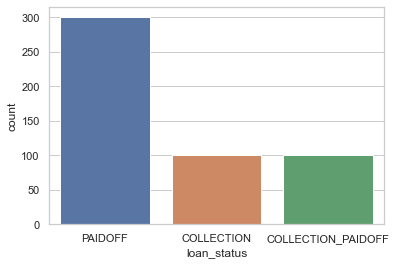

In [10]:
x = sns.countplot(x="loan_status", data=df )

Out of 500 entries, 300 are PaidOff, 100 are in Collection & again 100 are in CollectionPaidOff status

That means, 60% of loan are in PAID OFF State while , 20% are in Collection and 20% are in CollectionPaidOff status

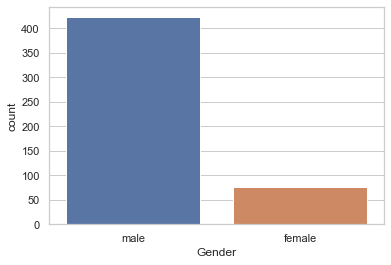

In [11]:
y = sns.countplot(x="Gender", data=df )

From the above graph , it is clear that most of Loans are taken by Males as compared to Females.

In [14]:
#Relationship between two categorical variables
pd.crosstab(df['loan_status'], df['Gender'])

Gender,female,male
loan_status,,
COLLECTION,10,90
COLLECTION_PAIDOFF,14,86
PAIDOFF,53,247


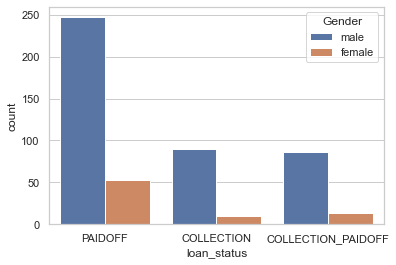

In [15]:
z = sns.countplot(x="loan_status", data= df , hue='Gender')

###############################################################################################################################

Let's see how many people loan applications have been applied for weekly (7 days), Fortnightly (15 Days) , Monthly (30days) payment mode and whats the loan status , how well are weekly, fortnightly and monthly loans are in terms of paid status.

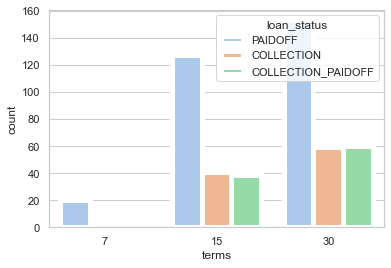

In [16]:
m = sns.countplot(x="terms", data= df , hue='loan_status', palette='pastel', linewidth=5)

From above graph we can see that very few people go for weekly pay off , however fortnighty and monthly payment modes are quiet famous & Most of the applications are having monthly mode as people do get monthly wages mostly from where they would like to pay off for the loan amount.

###############################################################################################################################

**Lets see how education affects the loan amount and payment status ?**

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



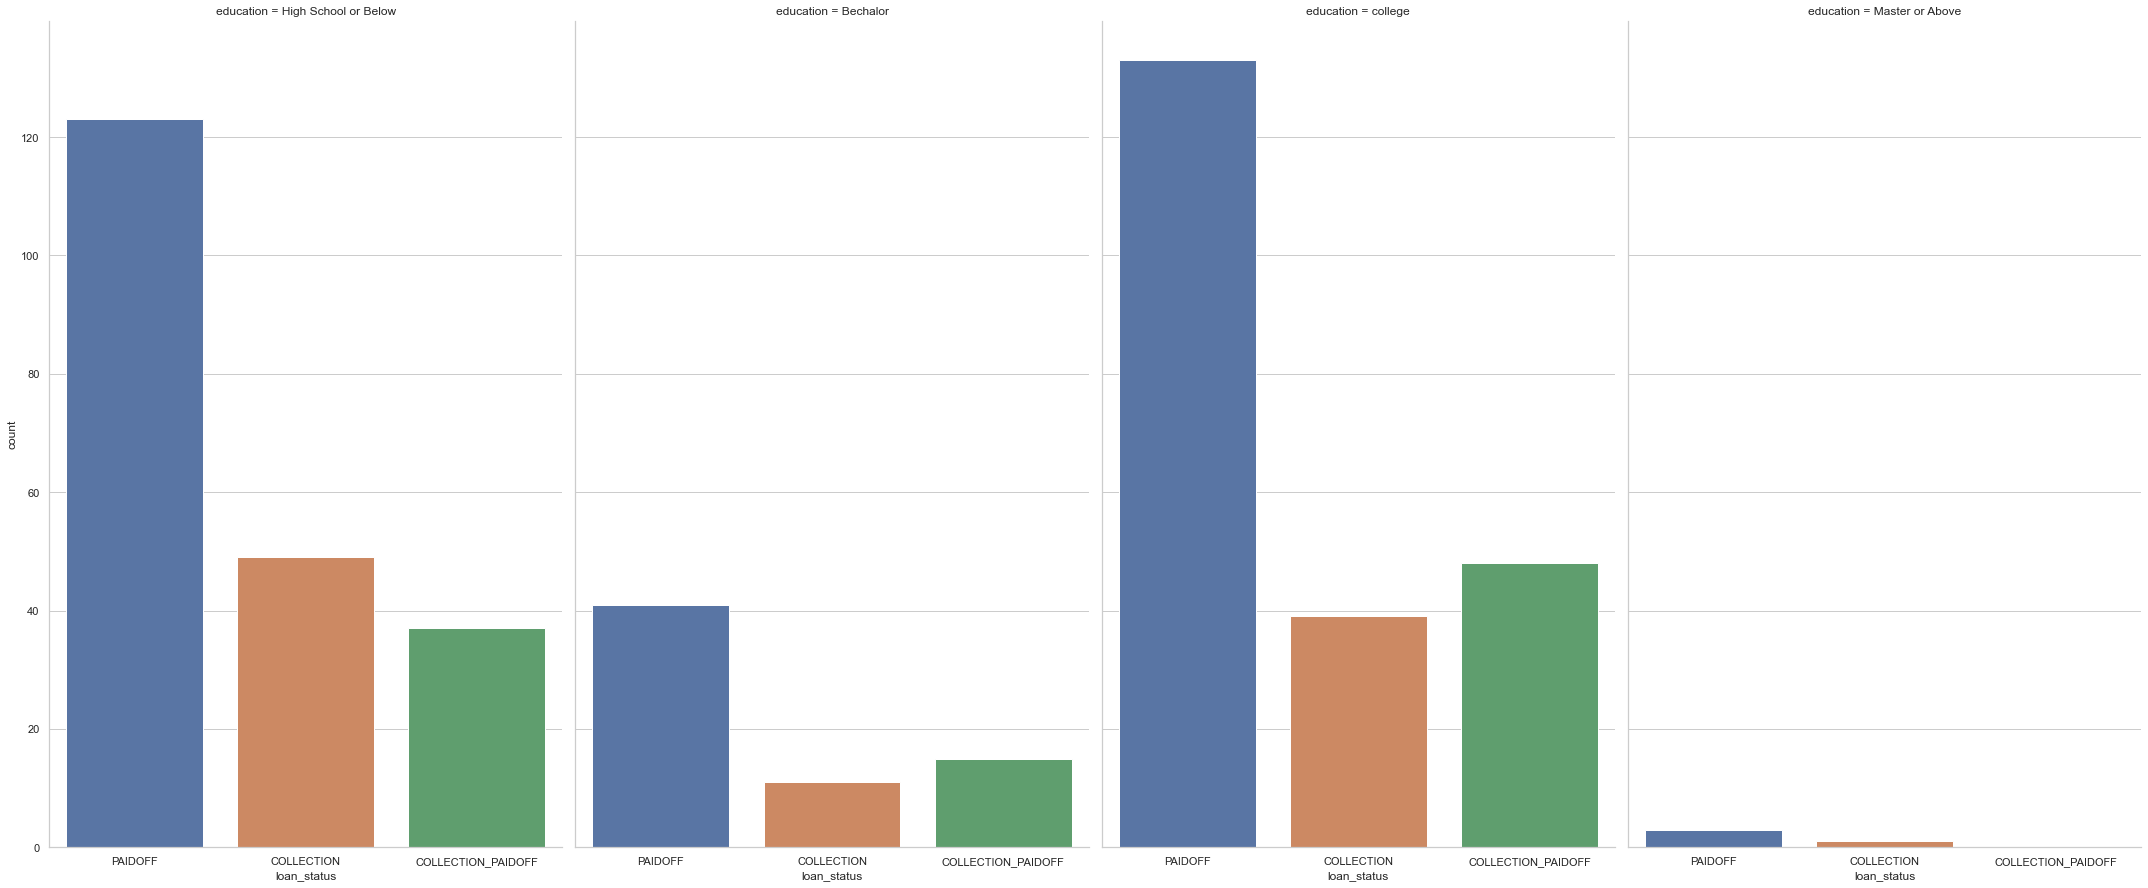

In [17]:
n = sns.catplot("loan_status", col="education", col_wrap=4,
                data=df[df.loan_status.notnull()],
                kind="count", height=12.5, aspect=.6)

Above visualisation shows that most of the loans applied in below series

1) College
2) High School or below
3) Bachelor
4) Master and Above

Well from above graph we can deduce that most of the college or high school students apply for the loan and pay back well in time so they are better candidates for loans by banks

However for Bachelors degree students - Loan applications are less and return is also not so rewarding means a bit less preferable to return the money by themselves



Lastly - Very few loan applications for students going for Masters and above degree which is a valid insight as very few people (from crowd) opt for masters degree or higher (bit costly than others) so less applicants for loan. Such candidates pay off well and very few people take time to pay back to bank

###############################################################################################################################

Now lets visualize Age vs Principal amount based on Gender

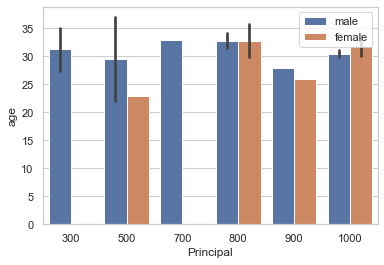

In [18]:
comb = sns.barplot(x="Principal", y="age",hue="Gender" ,  data= df)
comb.legend(loc="upper right")

Above visualisation shows us Age vs Principal amount based on Gender

<AxesSubplot:xlabel='Gender', ylabel='age'>

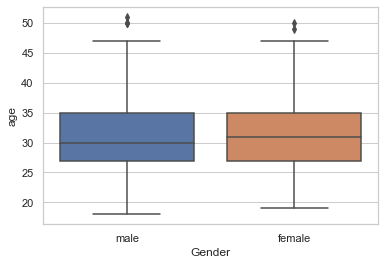

In [19]:
# Relationship between categorical and continuous variable
sns.boxplot(x="Gender", y="age", data = df)  # Age distribution with respect to gender

From this boxplot, we can observed that there are Most of Age group is of between 27-35 who has taken a Loan .

There is also outlies in this group.

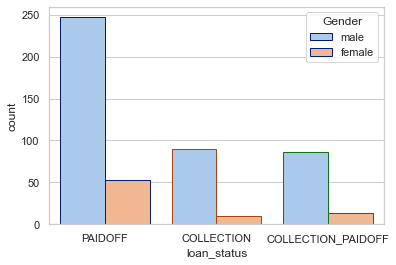

In [20]:
sns.set(style="whitegrid")
ax = sns.countplot(x="loan_status", hue="Gender", data= df ,palette='pastel' ,edgecolor=sns.color_palette("dark", 3))

Well above insight is almost same telling about how many applications are Paid Off , in Collection , Collection_PaidOff Status.

<Figure size 1800x360 with 0 Axes>

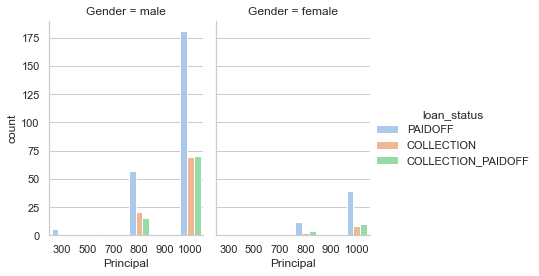

In [21]:
fig = plt.figure(figsize=(25,5))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data= df , kind="count",
                 height=4, aspect=.7)

Now if we want to showcase different graphs for different Gender to understand how many Loan applications made by Male/Females

Above visuations is best example as it clearly shows that Male candidates do have more Loan applications compared to Female candidates and most of the canidates who apply for the loan are in higher side of Principal Amount means they wish to go for Better studies.

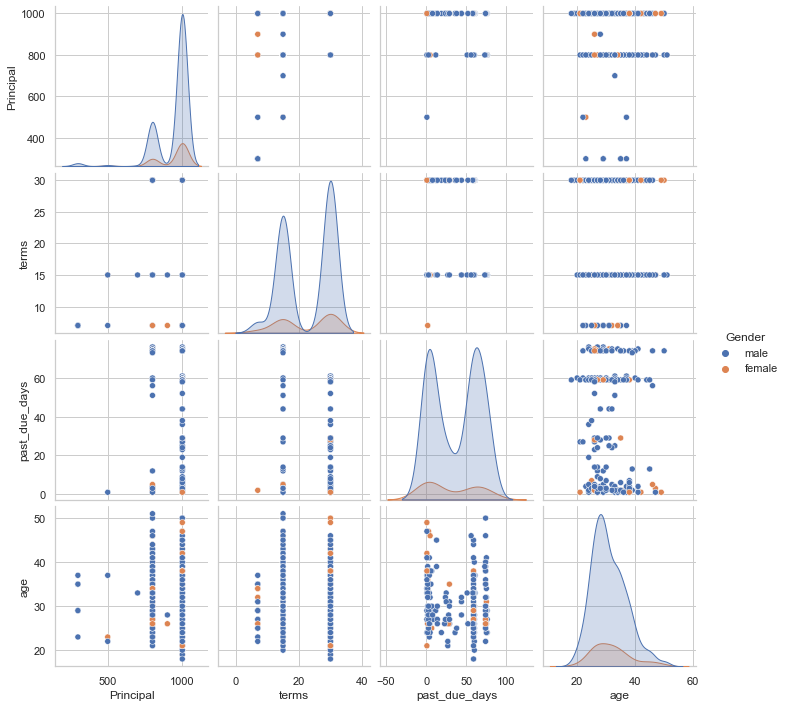

In [22]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(df, hue='Gender')

In [23]:
#Relationship between two categorical variables
pd.crosstab(df['loan_status'], df['Gender'])

Gender,female,male
loan_status,,
COLLECTION,10,90
COLLECTION_PAIDOFF,14,86
PAIDOFF,53,247


Here also we can see, Males are higher number than that of Females.

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

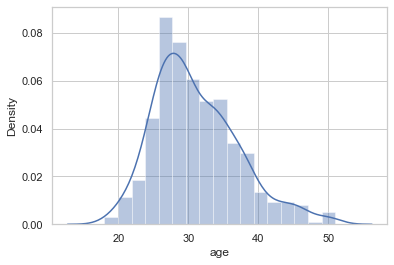

In [24]:
sns.distplot(df['age'])

The distribution plot for Age show us just littel Right squid, This is also because when we start earning or if you have any income source then only you are became eligible for the Loan.
That's why mean is at between 25-30 age.

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

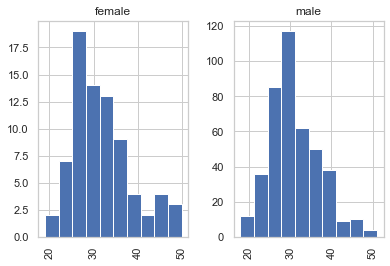

In [25]:
df.hist(by='Gender', column = 'age')

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

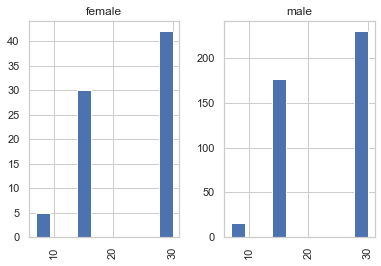

In [26]:
df.hist(by='Gender', column = 'terms')

In [27]:
defaultPerc=((df.shape[0]-df['past_due_days'].isnull().sum())/df.shape[0])*100
print(defaultPerc,"% of people paid after time")

40.0 % of people paid after time


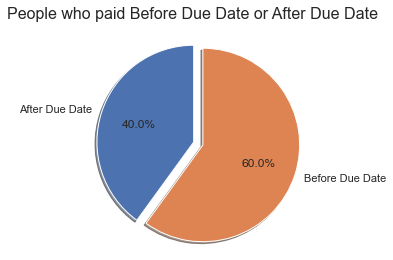

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'After Due Date', 'Before Due Date'
sizes = [defaultPerc,100-defaultPerc]
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.suptitle('People who paid Before Due Date or After Due Date', fontsize=16)


plt.show()

From above visualisation we can see that 40% people paid loan after due date which is not a good figure we need to work on our loan collection process and streamlining the loan guidelines so that people pay before time rather than being defaulter

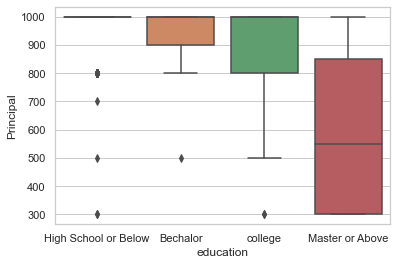

In [29]:
sns.boxplot(x='education', y='Principal', data= df)
plt.show()

Box Plot -

Another great visualisation to see data spread, median and outliers in the dataspread

From above visualisation we can clearly see that people going for better education ( College , Masters ) apply for high Principal amount of loan , which is true , better/Higher educations are costly and come with price

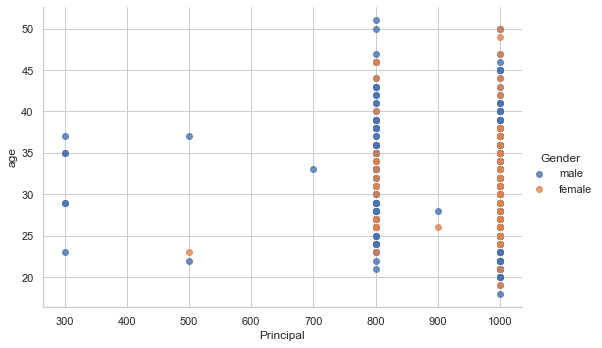

In [30]:
sns.lmplot(x='Principal', y='age', hue = 'Gender', data= df, aspect=1.5, fit_reg = False)

plt.show()

Below is just another visualisation showing both male and female applicants who are going for higher education apply for Principal amount of 800 or 1000



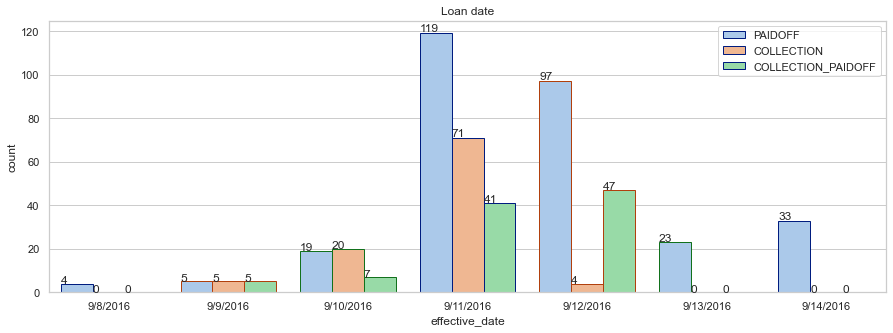

In [31]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="effective_date", hue="loan_status", data= df ,palette='pastel' ,edgecolor=sns.color_palette("dark", 3))
ax.set_title('Loan date')
ax.legend(loc='upper right')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show()

Above figure shows some unsual activity of loan applicants on 11 September ( need to check with Business Sales Expert) on reason why so many people applied/got loan on 11th September? What was unusual as most of the people who applied on 11th September are in defaulters' list ( Did we gave loans to Negative Credit Rating people as well without doing enough background checks ? )

We should definitely check business reason for high number of loan applications on 11th September which could further reveal the facts like lesser interest rates etc or loan without background check or any suspicious activities so we need to check with Bank Sales team expert what and why this happened and what we doing to prevent such occurances in future

###############################################################################################################################

1) People going for higher studies apply for loan with Principal Amount of 800 , 1000

2) Male candidates apply wide variety of loans

3) 40% of people applying for loans to this (xyz) bank are defaulters whcih means bank need to work on their policies and recovering rules

4) An unsual activity seen in data on 11th September showing very high sales with a higher defaulters - 4.1 any change in bank loan policy on 11th Sep 4.2. Was our loan agent well aware about loan policy before giving loan to customer 4.3 Did our loan agent do proper credit rating checks before giving loans? 4.4 Similarly seems like even on 9th , 10th Sep some policy check failure , which dindt check credit worthiness of applicants